![alt text](<../pics/einstein dinner address.png>)

<span style= "font-family:Monotype Corsiva">image and audio source</span> - https://www.youtube.com/watch?v=twLxPG75k-8  
<span style= "font-family:Monotype Corsiva">speech duration</span> - 9:09

### <span style= "font-family:Monotype Corsiva;">Albert Einstein’s speech at the 5th Nobel Anniversary Dinner on December 10, 1945, is a significant political statement delivered shortly after the end of World War II and the atomic bombings. He reflected on the moral responsibility of scientists who contributed to the development of nuclear weapons, warned of geopolitical divisions threatening peace, and condemned ongoing injustices, especially the plight of European Jews. Einstein urged for a radical change in political attitudes to prevent civilization’s downfall. The speech effectively used ethos, pathos, and logos to appeal to a distinguished audience of scientists, politicians, and Nobel laureates, emphasizing both the promise and peril of scientific progress and the necessity for peace and justice.</span>

### <span style= "font-family:Monotype Corsiva">**Imports, Read, and Data Info**</span>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from wordcloud import WordCloud,STOPWORDS
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim import corpora, models
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

nltk.download(['punkt', 'stopwords', 'vader_lexicon'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bebop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bebop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bebop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
einstein = pd.read_csv("Einstein_Dinner_Address.csv", header=None)
einstein.head()

,0
0,"Ladies and gentlemen, the Nobel Universary cel..."


In [3]:
einstein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


### <span style= "font-family:Monotype Corsiva">**Word Counts and Stopword Removal**</span>  

- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Print the word count of Einstein's speech</span>
- <span style= "font-family: 'Monotype Corsiva'; font-size: 22px;">Print the count for total number of stopwords removed</span>   
- <span style= "font-family: 'Monotype Corsiva'; font-size: 22px;">Visualize before and after stopword removal</span>

In [4]:
# Word Count for speech
full_text = " ".join(einstein[0].astype(str))
word_count = len(full_text.split())

word_count

1078

In [5]:
#lower case and assign text 
text = ' '.join(einstein[0].dropna().astype(str))
text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

In [6]:
#Default English stopwords
stop_words = nltk.corpus.stopwords.words('english')
print("Total number of stopwords:", len(stop_words))

Total number of stopwords: 198


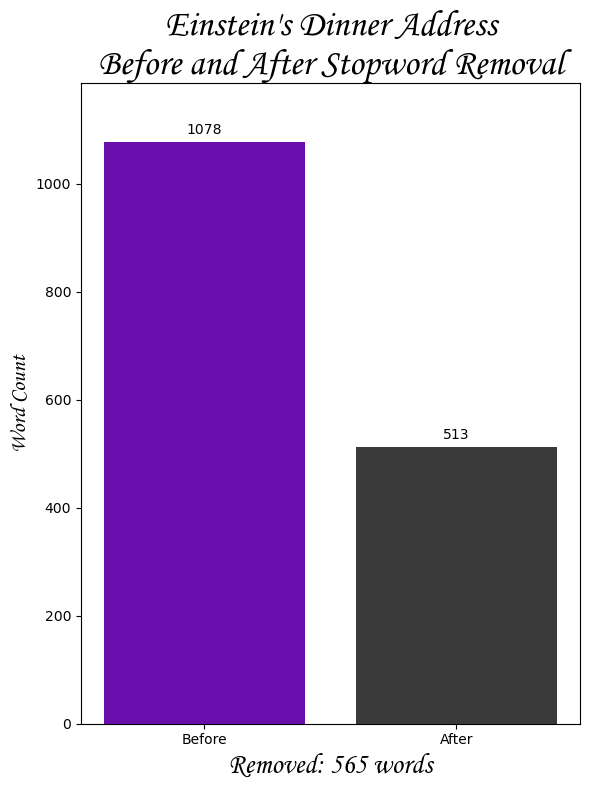

In [7]:
#Before and After Stopword removal
tokens_before = word_tokenize(text)
word_count_before = len(tokens_before)

tokens_after = [word for word in tokens_before if word.lower() not in stop_words and word.isalpha()]
word_count_after = len(tokens_after)

#get the count
removed_count = word_count_before - word_count_after

fig, ax = plt.subplots(figsize=(6, 8))
bars = ax.bar(['Before', 'After'], [word_count_before, word_count_after], color=['#6A0DAD', '#3A3A3A'])
ax.set_title("Einstein's Dinner Address\nBefore and After Stopword Removal", fontsize=26, fontweight="bold", fontname="Monotype Corsiva")
ax.set_ylabel('Word Count', fontsize=16, fontweight="bold", fontname="Monotype Corsiva")
ax.set_xlabel(f"Removed: {removed_count:,} words", fontsize=20, fontweight="bold", fontname="Monotype Corsiva")
ax.bar_label(bars, padding=3)
ax.set_ylim(0, word_count_before * 1.10)

plt.tight_layout()
plt.show()

### <span style= "font-family:Monotype Corsiva">**Topic Modeling (LDA)**</span>  

- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Generate a complete speech WordCloud</span>
- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Train LDA model and print the results</span>  
- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Generate WordCloud for the topics</span>

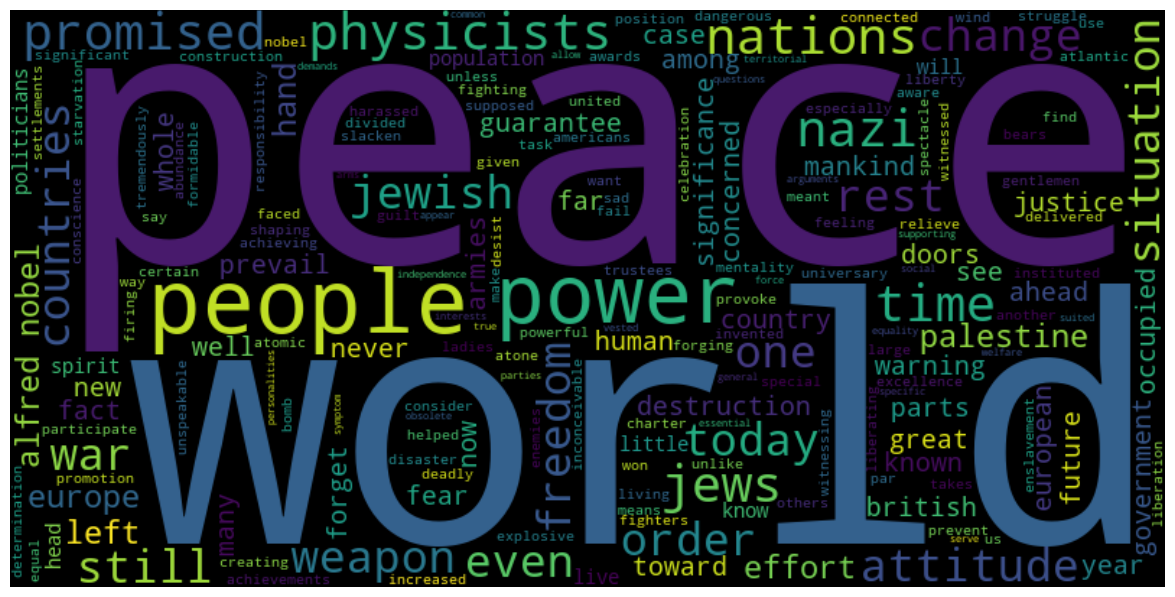

In [8]:
#Complete Speech WordCloud Generation
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
# LDA Model and Results
#function to process 
def preprocess_text(text):  
    sentences = sent_tokenize(text)    
    stop_words = set(stopwords.words('english'))
    processed_text = []
    
    for sentence in sentences:
        cleaned = re.sub(r'[^a-zA-Z\s]', '', sentence).lower()
        tokens = word_tokenize(cleaned)        
        filtered = [word for word in tokens if word not in stop_words and len(word) > 2]
        processed_text.append(filtered)
    
    return processed_text

df = pd.read_csv('Einstein_Dinner_Address.csv', header=None)

text = df.iloc[0,0]
tokenized_speech = preprocess_text(text)
dictionary = corpora.Dictionary(tokenized_speech)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_speech]

# LDA model Training
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=15
)

# results
for idx, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    words = [word for word, prob in topic]
    print(f"Topic {idx+1}: {', '.join(words)}")


Topic 1: world, alfred, nobel, rest, prevail, spirit, would, justice, mankind, destruction
Topic 2: promised, nations, powers, today, peace, fear, war, freedom, nazi, europe
Topic 3: peace, time, jews, world, order, known, many, even, nobel, well
Topic 4: physicists, little, war, far, attitude, still, change, future, whole, situation
Topic 5: people, case, know, warning, jewish, left, head, politicians, try, advises


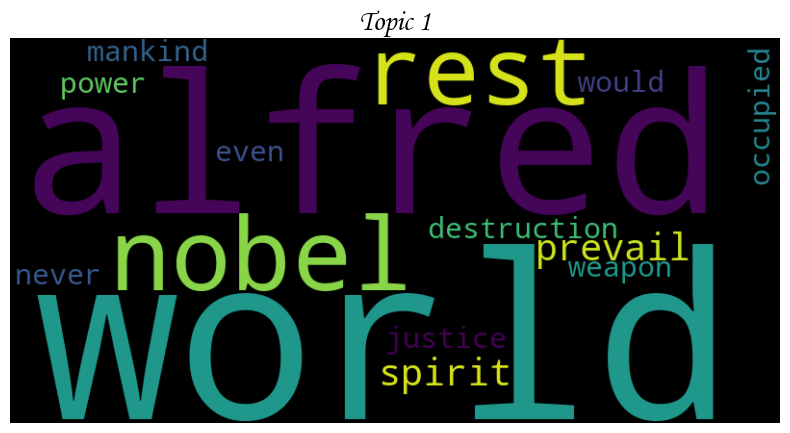

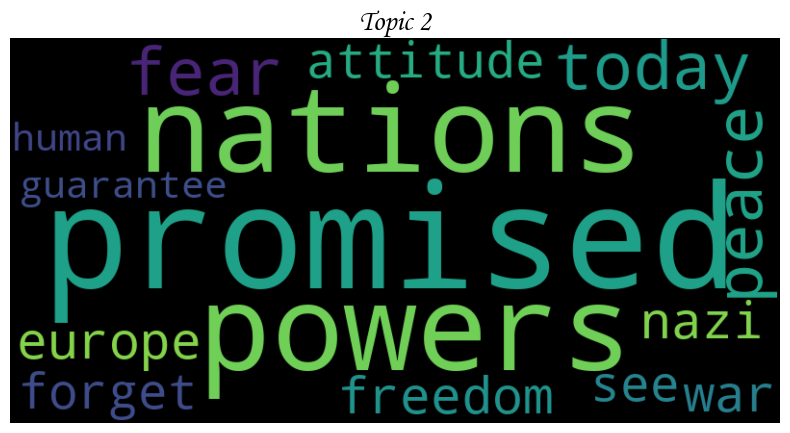

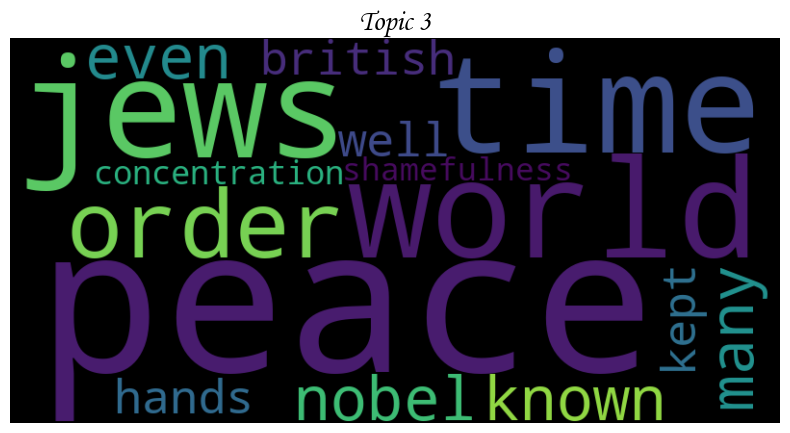

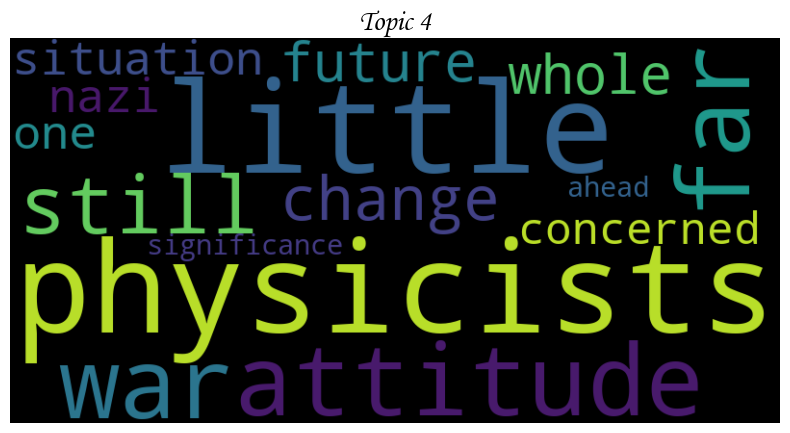

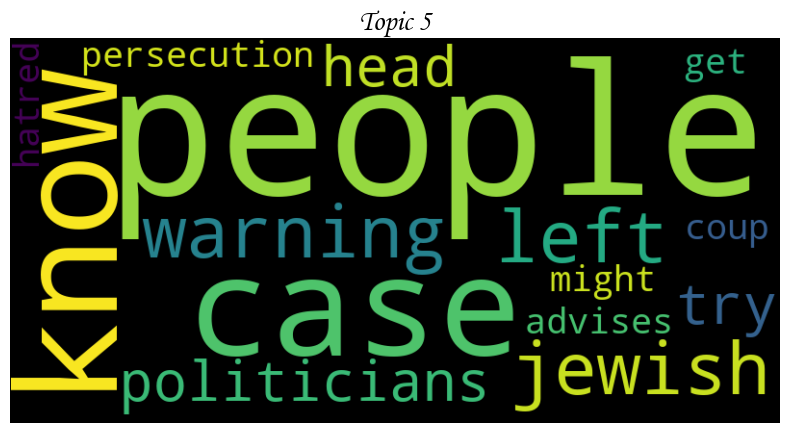

In [10]:
# Topic WordCloud Generation
for idx, topic in lda_model.show_topics(num_topics=5, num_words=15, formatted=False):
    topic_words = dict(topic)
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {idx+1}", fontsize=20, fontweight="bold", fontname="Monotype Corsiva")
    plt.show()

### <span style= "font-family:Monotype Corsiva">**Frequency Rates and Bigrams**</span>  

- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Uncover Top 20 Words Used in Speech</span>  
- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Bigrams Count</span>

In [11]:
# Top 20 Words in Speech
all_words = [word for sentence in tokenized_speech for word in sentence]
word_counts = Counter(all_words)
top_20 = word_counts.most_common(20)
df_top_words = pd.DataFrame(top_20, columns=['word', 'count'])
print(df_top_words)

          word  count
0        peace      9
1        world      8
2       people      6
3        nobel      4
4   physicists      4
5      nations      4
6     promised      4
7         jews      4
8        still      3
9          one      3
10      alfred      3
11        time      3
12       order      3
13       today      3
14      weapon      3
15    attitude      3
16       would      3
17         war      3
18      powers      3
19        even      3


In [12]:
#gather words for Bigrams
all_words = [word for sentence in tokenized_speech for word in sentence]
bigrams = list(ngrams(all_words, 2))
bigram_counts = Counter(bigrams).most_common(20)
df_bigrams = pd.DataFrame(bigram_counts, columns=['bigram', 'count'])

print(df_bigrams)

                       bigram  count
0             (alfred, nobel)      3
1               (rest, world)      2
2            (see, guarantee)      2
3           (world, promised)      2
4         (promised, freedom)      2
5                (war, world)      2
6         (ladies, gentlemen)      1
7          (gentlemen, nobel)      1
8         (nobel, universary)      1
9   (universary, celebration)      1
10       (celebration, takes)      1
11           (takes, special)      1
12    (special, significance)      1
13       (significance, year)      1
14             (year, deadly)      1
15         (deadly, struggle)      1
16           (struggle, many)      1
17              (many, years)      1
18             (years, peace)      1
19          (peace, supposed)      1


### <span style= "font-family:Monotype Corsiva">**Sentiment Analysis**</span>  

- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Establish and Visualize Overall Sentiment</span>  
- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Look at Sentence Sentiment Distribution</span>  
- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Plot Trajectory Across Speech</span> 

In [13]:
sia = SentimentIntensityAnalyzer()

sentiment = sia.polarity_scores(text)
print(f"""
Positive: {sentiment['pos']*100:.1f}%
Negative: {sentiment['neg']*100:.1f}%
Neutral: {sentiment['neu']*100:.1f}%
Compound: {sentiment['compound']:.2f}
""")


Positive: 15.7%
Negative: 14.5%
Neutral: 69.8%
Compound: 0.47



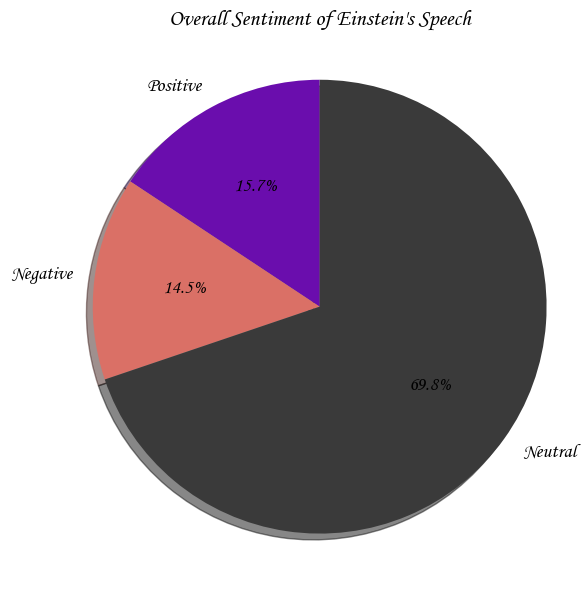

In [14]:
sentiment = sia.polarity_scores(text)
labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment['pos'], sentiment['neg'], sentiment['neu']]
colors = ['#6A0DAD', '#DA7066', '#3A3A3A']  

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    textprops={'fontname': 'Monotype Corsiva', 'fontsize': 14}
)
plt.title("Overall Sentiment of Einstein's Speech", fontsize=16, fontweight="bold", fontname="Monotype Corsiva")
plt.axis('equal')  
plt.tight_layout()
plt.show()

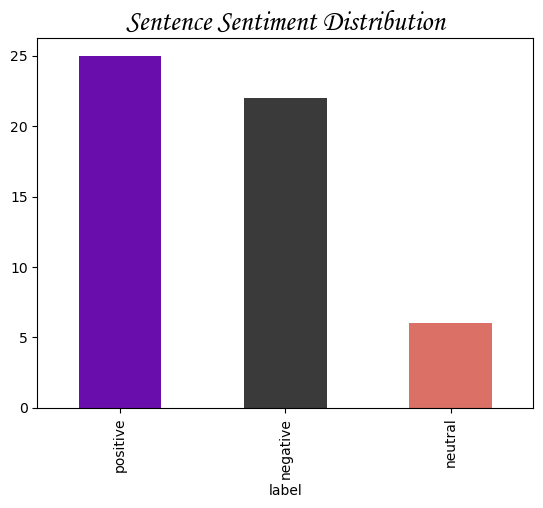

In [15]:
sentences = sent_tokenize(text)
results = []
for sentence in sentences:
    scores = sia.polarity_scores(sentence)
    results.append({
        'sentence': sentence,
        'positive': scores['pos'],
        'negative': scores['neg'],
        'compound': scores['compound']
    })

sentiment_df = pd.DataFrame(results)

sentiment_df['label'] = sentiment_df['compound'].apply(
    lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')
)

sentiment_df['label'].value_counts().plot(kind='bar', color=['#6A0DAD', '#3A3A3A', '#DA7066'])
plt.title("Sentence Sentiment Distribution", fontsize=20, fontweight="bold", fontname="Monotype Corsiva")
plt.show()

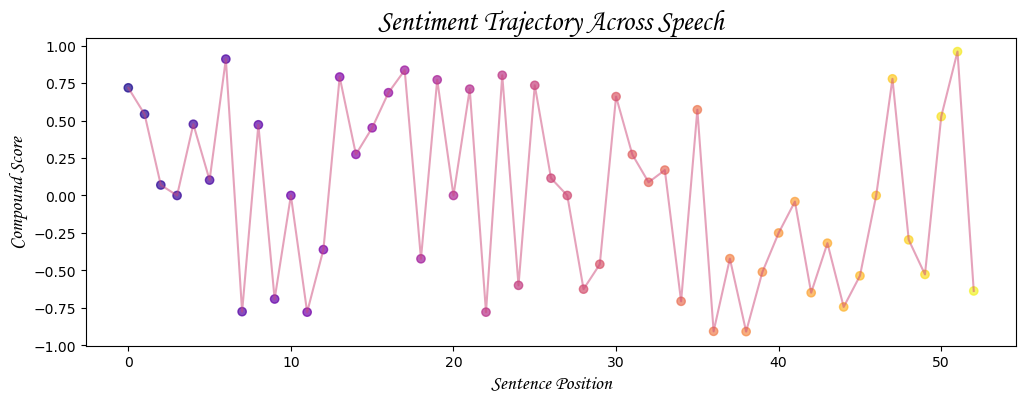

In [16]:
num_points = len(sentiment_df['compound'])
colors = sns.color_palette('plasma', n_colors=num_points)

plt.figure(figsize=(12,4))
plt.scatter(
    range(num_points),
    sentiment_df['compound'],
    c=colors,
    marker='o',
    alpha=0.7
)
plt.plot(sentiment_df['compound'], color=colors[num_points//2], alpha=0.5)  # Use a mid-palette color for the line
plt.title("Sentiment Trajectory Across Speech", fontsize=20, fontname="Monotype Corsiva")
plt.ylabel("Compound Score", fontsize= 14, fontname="Monotype Corsiva")
plt.xlabel("Sentence Position", fontsize= 14, fontname="Monotype Corsiva")
plt.show()

### <span style= "font-family:Monotype Corsiva">**Rhetorical Analysis**</span>  

- <span style="font-family: 'Monotype Corsiva'; font-size: 22px;">Establish a Tone for Complete Speech</span> 

In [17]:
sentences = nltk.sent_tokenize(text)

sentiment_data = []
for sentence in sentences:
    blob = TextBlob(sentence)
    sentiment_data.append({
        'sentence': sentence,
        'polarity': blob.sentiment.polarity,  
        'subjectivity': blob.sentiment.subjectivity  
    })

df = pd.DataFrame(sentiment_data)

In [18]:
#Establish Polarity, Subjectivity, and Rhetorical Appeal
ethos_keywords = {'responsibility', 'duty', 'trust', 'honor', 'conscience', 'we', 'our', 'must'}
pathos_keywords = {'fear', 'hope', 'disaster', 'guilt', 'suffering', 'peace', 'liberation', 'justice', 'starvation'}
logos_keywords = {'because', 'therefore', 'since', 'as a result', 'data', 'evidence', 'fact', 'statistics', 'proved',
        'logic', 'reason', 'explanation', 'conclusion', 'implication', 'demonstrate', 'examine', 'deduce',
        'if', 'then', 'why', 'how', 'explains', 'analysis', 'result', 'consequently'}

def identify_rhetoric(sentence):
    words = set(sentence.lower().split())
    ethos = len(words & ethos_keywords)
    pathos = len(words & pathos_keywords)
    logos = len(words & logos_keywords)
    
    if max(ethos, pathos, logos) == 0:
        return 'neutral'
    if pathos >= ethos and pathos >= logos:
        return 'pathos'
    elif logos >= ethos and logos >= pathos:
        return 'logos'
    else:
        return 'ethos'

df['rhetorical_appeal'] = df['sentence'].apply(identify_rhetoric)
print(df[['polarity', 'subjectivity', 'rhetorical_appeal']])

    polarity  subjectivity rhetorical_appeal
0   0.219048      0.490476            pathos
1   0.000000      0.000000             ethos
2   0.437500      0.687500           neutral
3   0.000000      0.000000           neutral
4   0.400000      0.750000           neutral
5   0.000000      0.000000           neutral
6   0.000000      0.100000            pathos
7  -0.033333      0.550000           neutral
8   0.000000      0.000000             ethos
9   0.154762      0.607143             ethos
10 -0.062500      0.250000           neutral
11  0.136364      0.454545             ethos
12  0.000000      0.000000             ethos
13  0.200000      0.400000            pathos
14 -0.200000      0.650000             ethos
15  0.000000      0.000000             ethos
16  0.000000      0.000000            pathos
17  0.800000      0.750000            pathos
18  0.333333      1.000000             logos
19  0.000000      0.000000           neutral
20  0.214286      0.428571           neutral
21  0.0000

In [19]:
#Sentence and Rhetorical appeal 
print(df[['sentence', 'rhetorical_appeal']])

                                             sentence rhetorical_appeal
0   Ladies and gentlemen, the Nobel Universary cel...            pathos
1       Or what we are supposed to consider as peace.             ethos
2   And it bears a still more significant signific...           neutral
3   For these physicists find themselves in a posi...           neutral
4   Alfred Nobel invented the most powerful explos...           neutral
5              A means of destruction par excellence.           neutral
6   In order to atone for this, in order to reliev...            pathos
7   Today, the physicists who participate in forgi...           neutral
8    We cannot desist from warning and warning again.             ethos
9   We cannot and should not slacken in our effort...             ethos
10  Unless they change their attitude toward each ...           neutral
11  We helped in creating this new weapon in order...             ethos
12  We delivered this weapon into the hands of the...           

In [20]:
#rhetorical tagging
def tag_rhetoric(sentence):
    s = sentence.lower()
    ethos = any(word in s for word in ethos_keywords)  
    pathos = any(word in s for word in pathos_keywords)
    logos = any(word in s for word in logos_keywords)
    if ethos: return 'Ethos'
    if pathos: return 'Pathos'
    if logos: return 'Logos'
    return 'Other'

sentences = sent_tokenize(text)
rhetoric_tags = [tag_rhetoric(s) for s in sentences]
sentiment_df['rhetoric'] = [tag_rhetoric(s) for s in sentiment_df['sentence']]

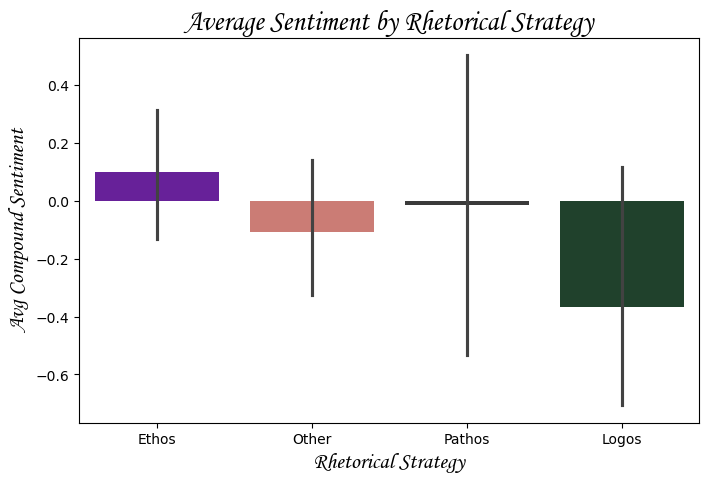

In [21]:
colors = ['#6A0DAD', '#DA7066', '#3A3A3A', '#1A472A']

plt.figure(figsize=(8,5))
sns.barplot(
    data=sentiment_df, 
    x='rhetoric', 
    y='compound', 
    hue='rhetoric',           
    palette=colors,
    legend=False             
)
plt.title("Average Sentiment by Rhetorical Strategy", fontsize=20, fontname="Monotype Corsiva")
plt.ylabel("Avg Compound Sentiment", fontsize=16, fontname="Monotype Corsiva")
plt.xlabel("Rhetorical Strategy", fontsize=16, fontname="Monotype Corsiva")
plt.show()

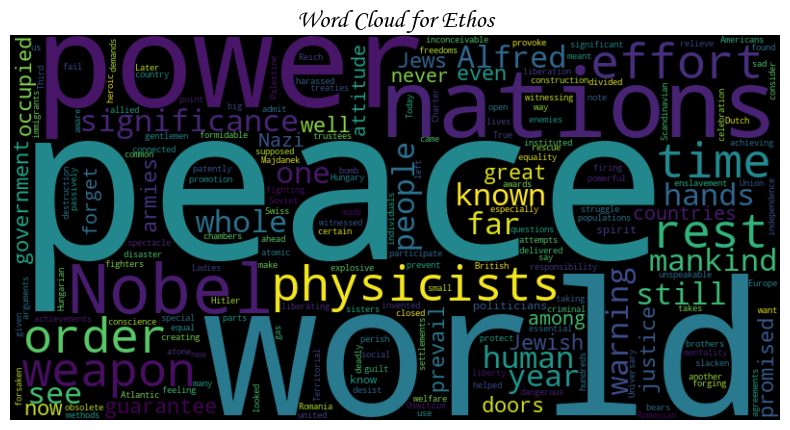

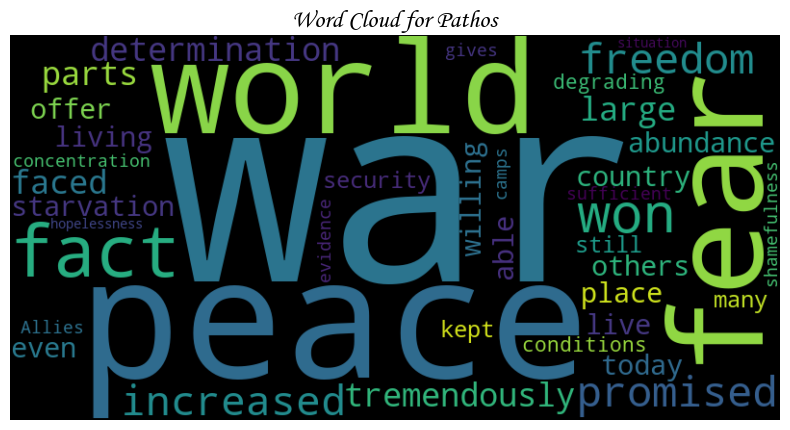

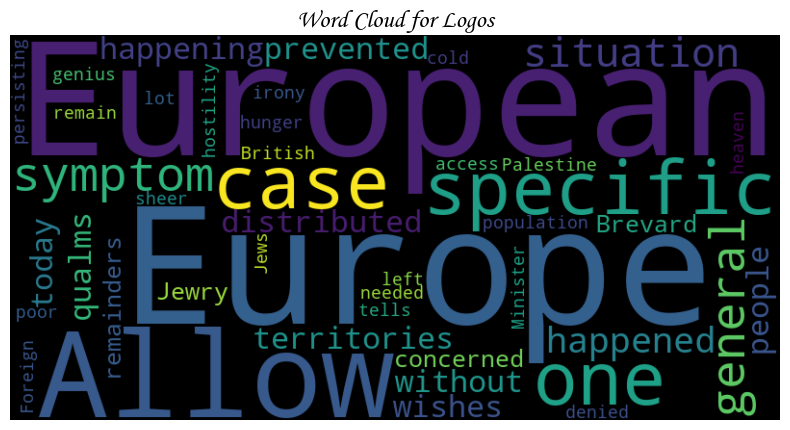

In [22]:
#WordCloud for the Ethos, Pathos, and Logos Sentiments
for strategy in ['Ethos', 'Pathos', 'Logos']:
    text_block = ' '.join(sentiment_df[sentiment_df['rhetoric']==strategy]['sentence'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_block)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {strategy}", fontsize=18, fontname="Monotype Corsiva")
    plt.show()

In [23]:
# Score
overall = sentiment_df['label'].value_counts(normalize=True)
print(f"Overall sentiment: {overall.idxmax()} ({overall.max()*100:.1f}%)")

Overall sentiment: positive (47.2%)


## <span style= "font-family:Monotype Corsiva">Final Thoughts</span>

<span style= "font-family:Monotype Corsiva; font-size: 40px;">I</span><span style= "font-family:Monotype Corsiva; font-size: 22px;">n conclusion, this analysis of Einstein’s 1945 Nobel Anniversary Dinner address reveals a speech that is both a warning and a call to action, rooted in the ethical responsibilities of scientists and the urgent need for global cooperation. By examining the rhetorical strategies, sentiment, and key themes, it becomes clear that Einstein was deeply concerned about the destructive potential of scientific advancements when divorced from moral considerations. He implored his audience-comprising fellow scientists and world leaders-to embrace a radical shift in political attitudes and to prioritize peace, justice, and the well-being of humanity. The findings highlight how Einstein’s message, delivered in the aftermath of unprecedented global conflict, remains profoundly relevant: scientific progress must always be guided by ethical principles and a commitment to the common good.</span>